# Multiple Linear Regression

##### what is this project's aim 
    - To understand the relationship between advertising budgets and sales volume for a product.
    - To predict sales volume for a new product campaign based on its advertising budgets.
    - To understand the role of each advertising channel in increasing sales volume.

### Data Dictionary

*TV* : The amount spent on TV advertising for the product in that campaign (in thousands of dollars). <br>

*Radio* : The amount spent on radio advertising for the product in that campaign (in thousands of dollars).<br>

*Newspaper* : The amount spent on newspaper advertising for the product in that campaign (in thousands of dollars).<br>

*Sales* : The sales volume generated by the product in that campaign (in thousands of units).<br>

<img src='https://blogger.googleusercontent.com/img/b/R29vZ2xl/AVvXsEgqmpGIfefsO1e-4GQthnFi0R8Y0oSswgXkwI6fdawqFxPGI0X2GnuBcpjciJ-0Z2Kfubt48WzqFf_a71_A1cKXRy60N24uCzk4LZCoHgilXz76Fj-qm0fdyh0s_3kFIRwOsIzjaswS77Xr/s1600/Compare+electronic+journalism+and+newspapers.jpg' style='display: block; margin-left: auto; margin-right: auto;'>

<a href='https://www.kaggle.com/datasets/ashydv/advertising-dataset' target= _blank> Can get data from this link

### Imports

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import re
import plotly.express as px 
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",100)

import datetime

from sklearn.linear_model import LinearRegression,SGDRegressor,Ridge,Lasso,ElasticNet
from sklearn.neighbors import KNeighborsRegressor, RadiusNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor, plot_tree, ExtraTreeRegressor
#pip install xgboost
from xgboost import XGBRegressor
from sklearn.svm import SVR

from sklearn.neural_network import MLPRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

from sklearn.preprocessing import StandardScaler

from scipy.stats import ttest_ind

In [66]:
#Import data from local
df = pd.read_csv("Advertising.csv")

### EDA

In [67]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [68]:
df.shape

(200, 4)

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [70]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
Radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
Newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
Sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


In [71]:
# Is there any null value
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

<Axes: >

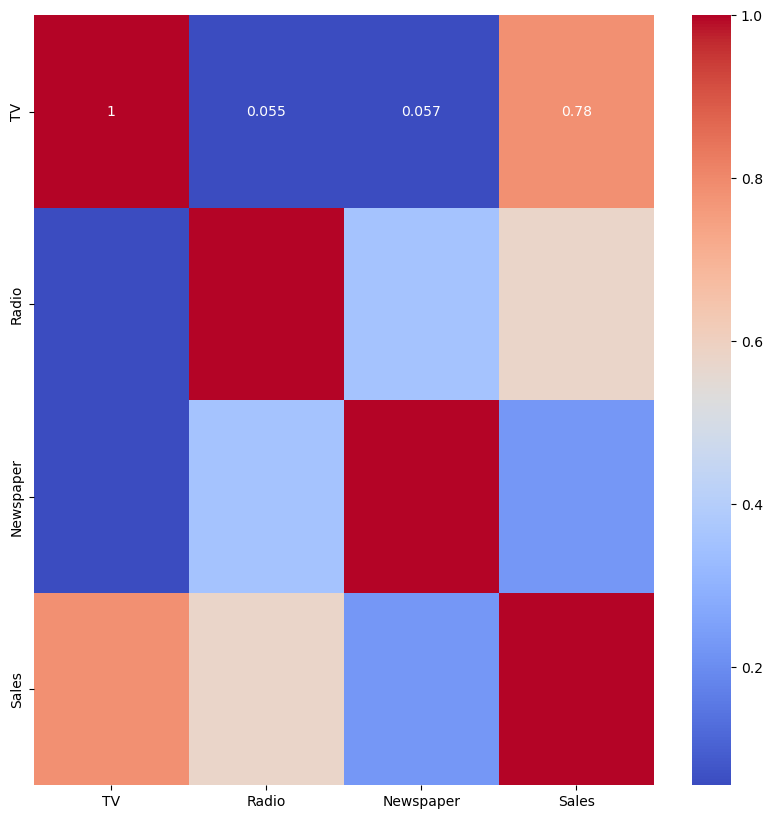

In [72]:
# calculate correlation for Sales column and show with a heatmap

df.corr(numeric_only=True)["Sales"].sort_values(ascending=False)
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True, cmap='coolwarm')


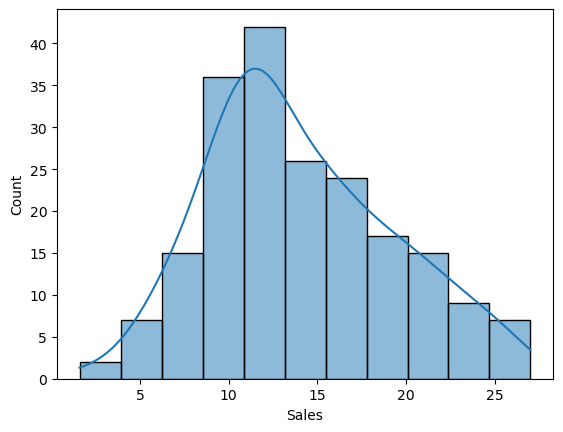

In [73]:
# Distrubution for Sales column
sns.histplot(df['Sales'], kde=True);

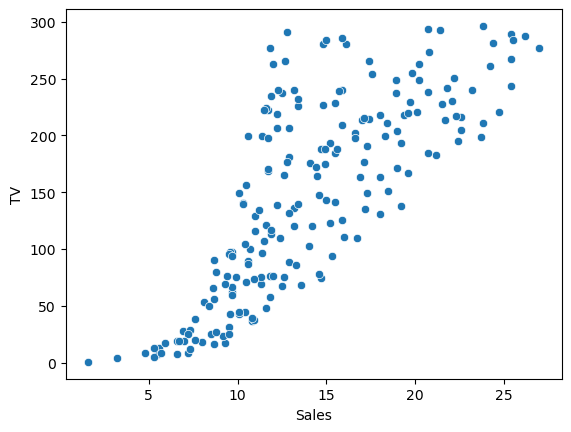

In [74]:
# relation between Sales column and Tv investments

sns.scatterplot(x='Sales', y='TV', data=df);


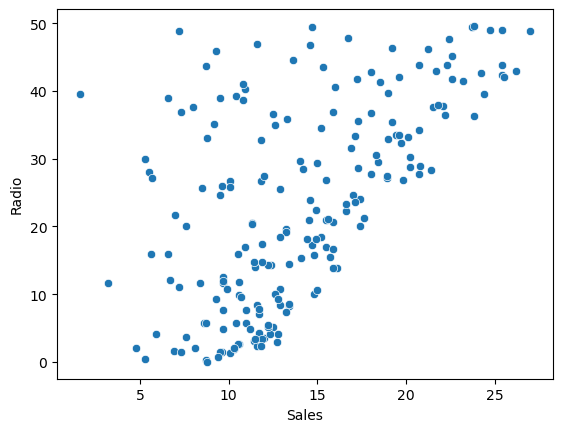

In [75]:
# relation between Sales column and Radio investments

sns.scatterplot(x='Sales', y='Radio', data=df);

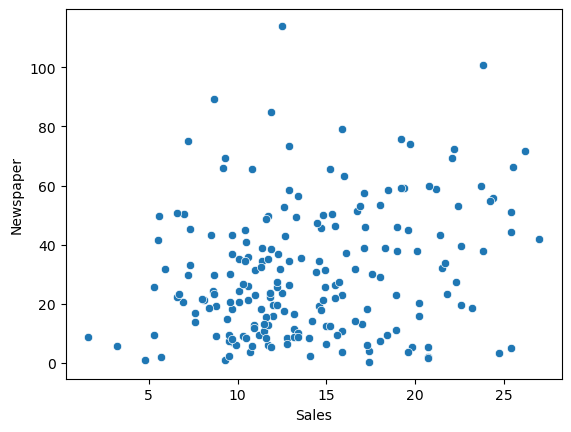

In [76]:
# relation between Sales column and Newspaper investments

sns.scatterplot(x='Sales', y='Newspaper', data=df);

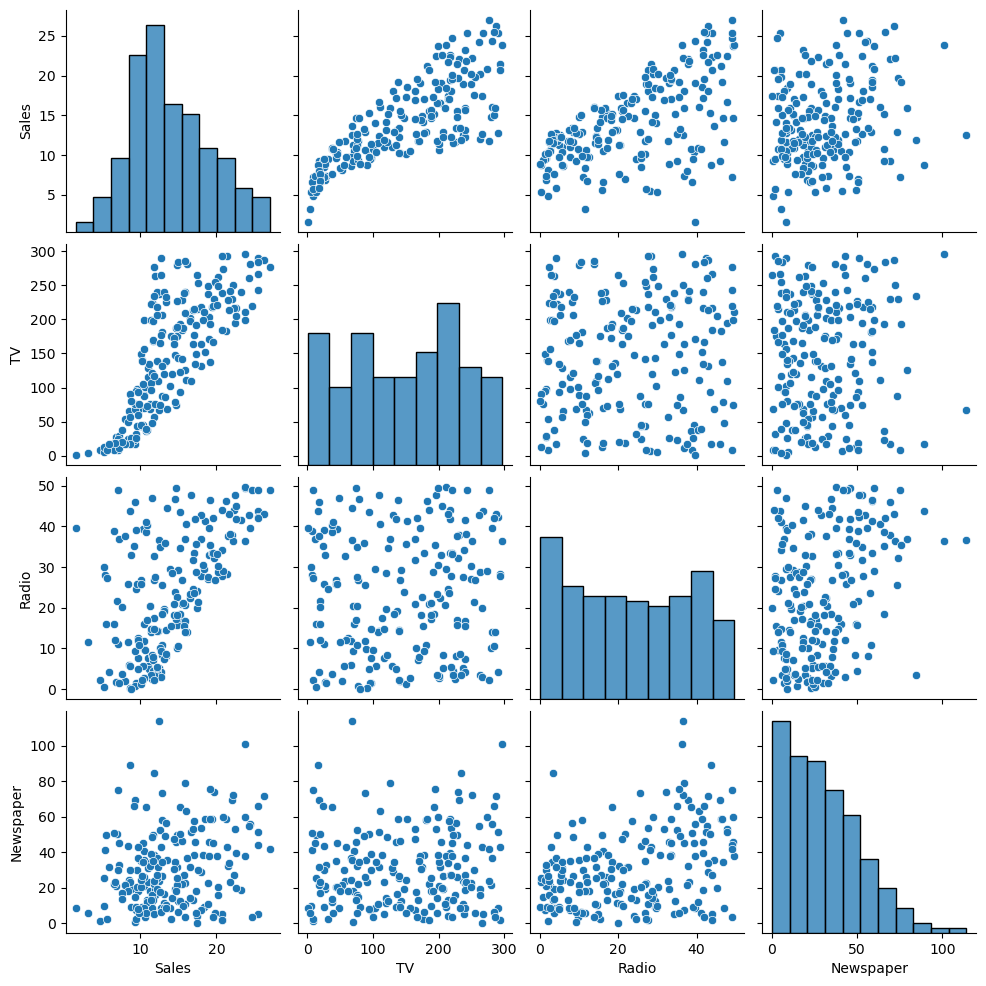

In [77]:
# effect of TV, Radio and Newspaper column on Sales column

sns.pairplot(df[['Sales', 'TV', 'Radio', 'Newspaper']]);


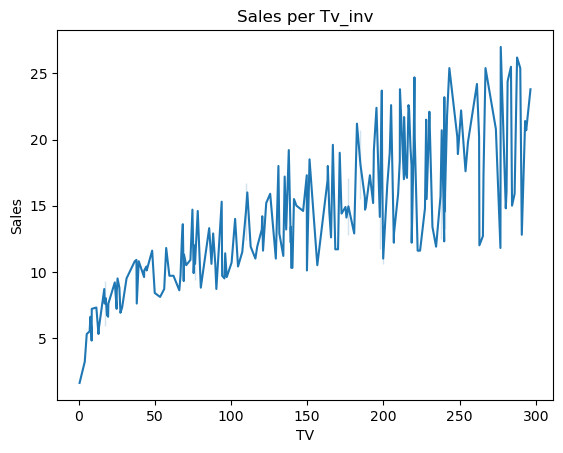

In [78]:
sns.lineplot(x = 'TV', y = 'Sales', data = df).set_title('Sales per Tv_inv');

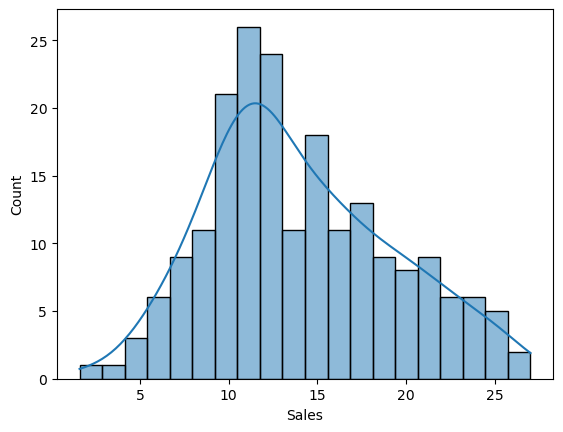

In [90]:
sns.histplot(x = df["Sales"],kde=True, bins = 20);

### Feature Engineering

In [83]:
df.corr(numeric_only=True)["Sales"].sort_values(ascending=False)

Sales        1.000000
TV           0.782224
Radio        0.576223
Newspaper    0.228299
Name: Sales, dtype: float64

In [89]:
# is any dublicator data

df.duplicated().sum()

0

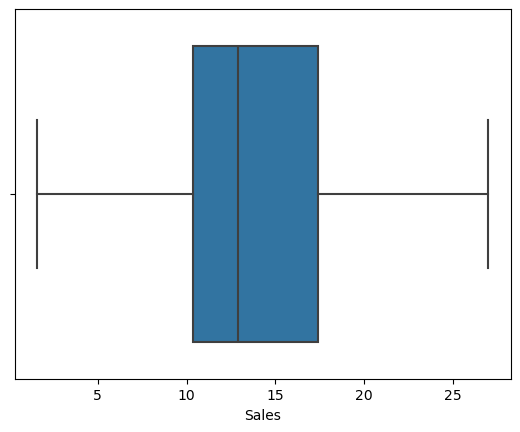

In [92]:
# is there any outlier on Sales column, look at boxplot

sns.boxplot(x=df['Sales']);

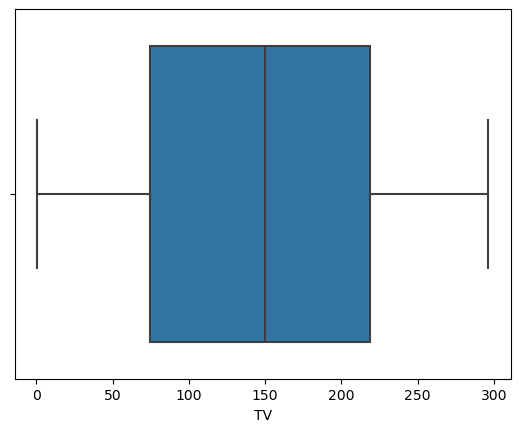

In [94]:
# is there any outlier on TV column, look at boxplot

sns.boxplot(x=df['TV']);

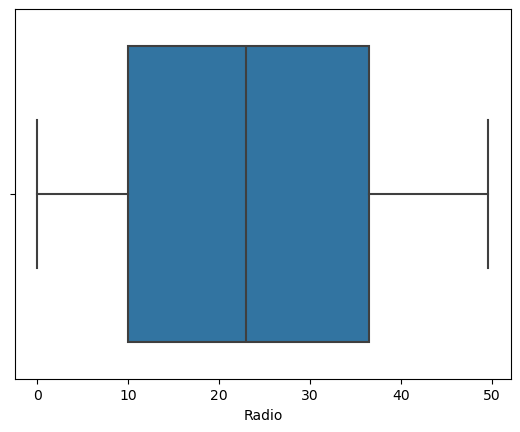

In [95]:
# is there any outlier on Radio column, look at boxplot

sns.boxplot(x=df['Radio']);

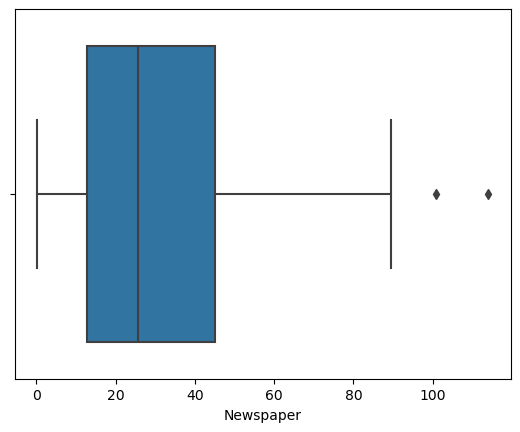

In [96]:
# is there any outlier on Newspaper column, look at boxplot

sns.boxplot(x=df['Newspaper']);

In [97]:
outliers = df.quantile(q = 0.97, numeric_only=True)

In [98]:
df = df[df['Newspaper'] < outliers['Newspaper']]

<Axes: xlabel='Newspaper'>

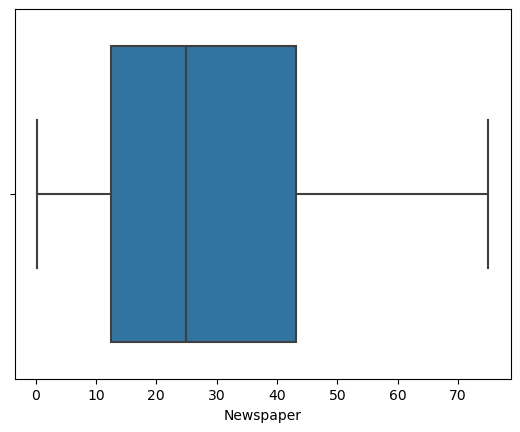

In [99]:
sns.boxplot(x='Newspaper', data=df)

In [100]:
x = df.drop(['Sales'], axis=1)
y = df['Sales']

### Modelling

In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",100)

from sklearn.linear_model import LinearRegression,SGDRegressor,Ridge,Lasso,ElasticNet
from sklearn.neighbors import KNeighborsRegressor, RadiusNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor, plot_tree, ExtraTreeRegressor
#pip install xgboost
from xgboost import XGBRegressor
from sklearn.svm import SVR

from sklearn.neural_network import MLPRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

from sklearn.preprocessing import StandardScaler


def algo_test(x,y):
        #Bütün modelleri tanımlıyorum
        L=LinearRegression()
        R=Ridge()
        Lass=Lasso()
        E=ElasticNet()
        sgd=SGDRegressor()
        ETR=ExtraTreeRegressor()
        GBR=GradientBoostingRegressor()
        kn=KNeighborsRegressor()
        rkn=RadiusNeighborsRegressor(radius=1.0)
        ada=AdaBoostRegressor()
        dt=DecisionTreeRegressor()
        xgb=XGBRegressor()
        svr=SVR()
        mlp_regressor = MLPRegressor()

       
        
        algos=[L,R,Lass,E,sgd,ETR,GBR,ada,kn,dt,xgb,svr,mlp_regressor]
        algo_names=['Linear','Ridge','Lasso','ElasticNet','SGD','Extra Tree','Gradient Boosting',
                    'KNeighborsRegressor','AdaBoost','Decision Tree','XGBRegressor','SVR','mlp_regressor']
        
        x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=.20,random_state=42)
        
        r_squared= []
        rmse= []
        mae= []
        
        #Hata ve doğruluk oranlarını bir tablo haline getirmek için bir dataframe oluşturuyorum
        result=pd.DataFrame(columns=['R_Squared','RMSE','MAE'],index=algo_names)
        
        
        for algo in algos:
            p=algo.fit(x_train,y_train).predict(x_test)
            r_squared.append(r2_score(y_test,p))
            rmse.append(mean_squared_error(y_test,p)**.5)
            mae.append(mean_absolute_error(y_test,p))
        
            

        #result adlı tabloya doğruluk ve hata oranlarımı yerleştiriyorum
        result.R_Squared=r_squared
        result.RMSE=rmse
        result.MAE=mae
        
       #oluşturduğum result tablosunu doğruluk oranına (r2_score) göre sıralayıp dönüyor
        rtable=result.sort_values('R_Squared',ascending=False)
        return rtable

In [102]:
algo_test(x,y)

,R_Squared,RMSE,MAE
Gradient Boosting,9.843748e-01,6.676917e-01,5.359191e-01
XGBRegressor,9.843130e-01,6.690108e-01,5.594945e-01
Decision Tree,9.720598e-01,8.928491e-01,7.205128e-01
KNeighborsRegressor,9.644957e-01,1.006477e+00,8.572275e-01
Extra Tree,9.599186e-01,1.069388e+00,8.717949e-01
AdaBoost,9.292841e-01,1.420437e+00,9.497436e-01
Linear,8.995264e-01,1.693127e+00,1.267680e+00
Ridge,8.995223e-01,1.693161e+00,1.267706e+00
ElasticNet,8.977252e-01,1.708236e+00,1.277979e+00
Lasso,8.964914e-01,1.718508e+00,1.284320e+00


In [103]:
import statsmodels.formula.api as smf

In [105]:
model = smf.gls('Sales ~ TV + Radio + Newspaper', data=df).fit()
print(model.summary())

                            GLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            GLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     554.2
Date:                Sat, 13 Jul 2024   Prob (F-statistic):           1.16e-93
Time:                        02:36:53   Log-Likelihood:                -374.40
No. Observations:                 194   AIC:                             756.8
Df Residuals:                     190   BIC:                             769.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9220      0.319      9.167      0.0

In [106]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.20, random_state=42)
L=LinearRegression()
L.fit(x_train, y_train)
L_pred = L.predict(x_test)

In [109]:
r2_score(y_test, L_pred)

0.8995263574958908

In [108]:
mean_squared_error(y_test, L_pred)**.5

1.6931269371410205

In [112]:
x_train

,TV,Radio,Newspaper
5,8.7,48.9,75.0
139,184.9,43.9,1.7
126,7.8,38.9,50.6
173,168.4,7.1,12.8
87,110.7,40.6,63.2
...,...,...,...
109,255.4,26.9,5.5
14,204.1,32.9,46.0
94,107.4,14.0,10.9
185,205.0,45.1,19.6


### Feature Importance

In [114]:
L.coef_

array([0.04564026, 0.17648327, 0.00511514])

In [111]:
fi = pd.DataFrame({'Feature': x_train.columns, 'Coefs': L.coef_})
fi = fi.sort_values(by='Coefs', ascending=False)

fi['Coefs'] = fi['Coefs'] * 100

fi

,Feature,Coefs
1,Radio,17.648327
0,TV,4.564026
2,Newspaper,0.511514


In [116]:
fi['inv_ratio'] = fi['Coefs'] * 100 / fi['Coefs'].sum()
fi

,Feature,Coefs,investment rate,inv_ratio
1,Radio,17.648327,77.664278,77.664278
0,TV,4.564026,20.084724,20.084724
2,Newspaper,0.511514,2.250998,2.250998


In [117]:
#show with pie chart fi

fig = px.pie(fi, values='inv_ratio', names='Feature', title='Feature Importance')
fig.show()

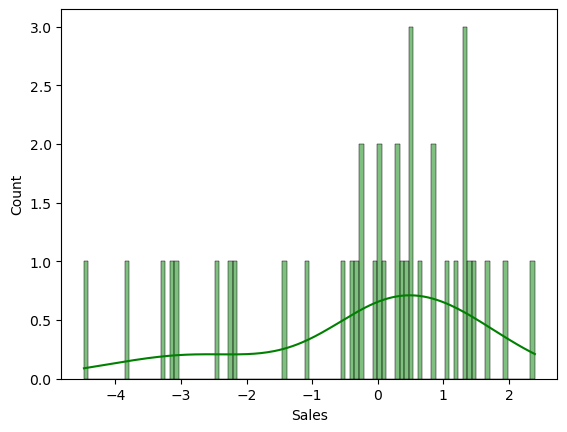

In [124]:
residuals =y_test - L_pred 
sns.histplot(residuals, kde=True, bins=100, color='green');

Text(0.5, 1.0, 'Comparison of Real and Predicted Sales')

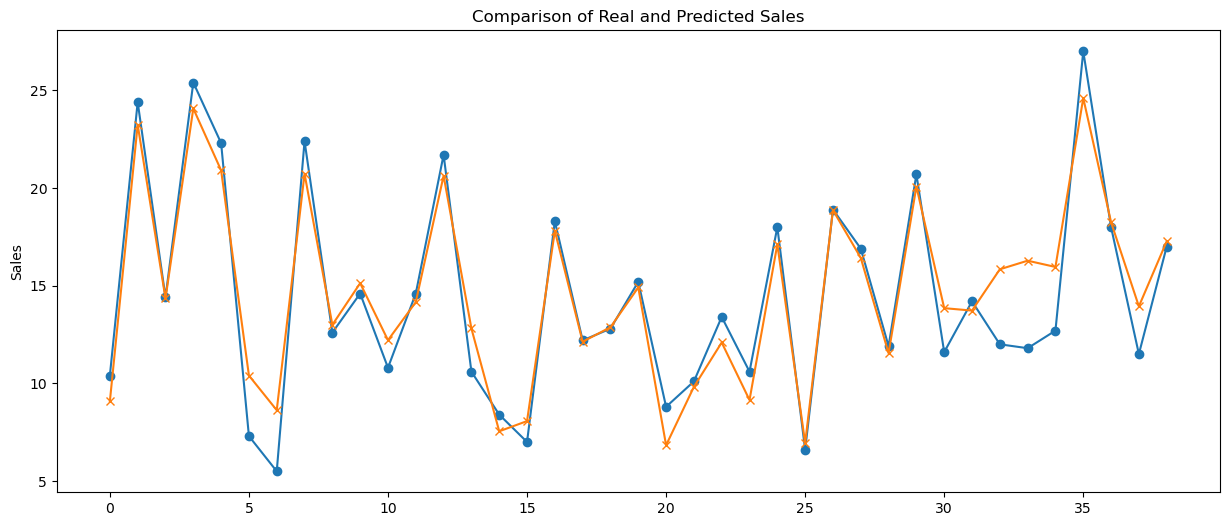

In [125]:
#compare real sales and predicted sales

plt.figure(figsize=(15, 6))
plt.plot(y_test.values, label='Real Sales', marker='o')
plt.plot(L_pred, label='Predicted Sales', marker='x')
plt.ylabel('Sales')
plt.title('Comparison of Real and Predicted Sales')
